                Sales  MarketingSpend  CustomerVisits
2023-01-01  52.483571       15.753888      111.454817
2023-01-02  49.808678       18.838064      115.026877
2023-01-03  54.238443       19.254699      120.457862
2023-01-04  59.115149       18.112783      119.594412
2023-01-05  50.829233       20.316143       96.381378


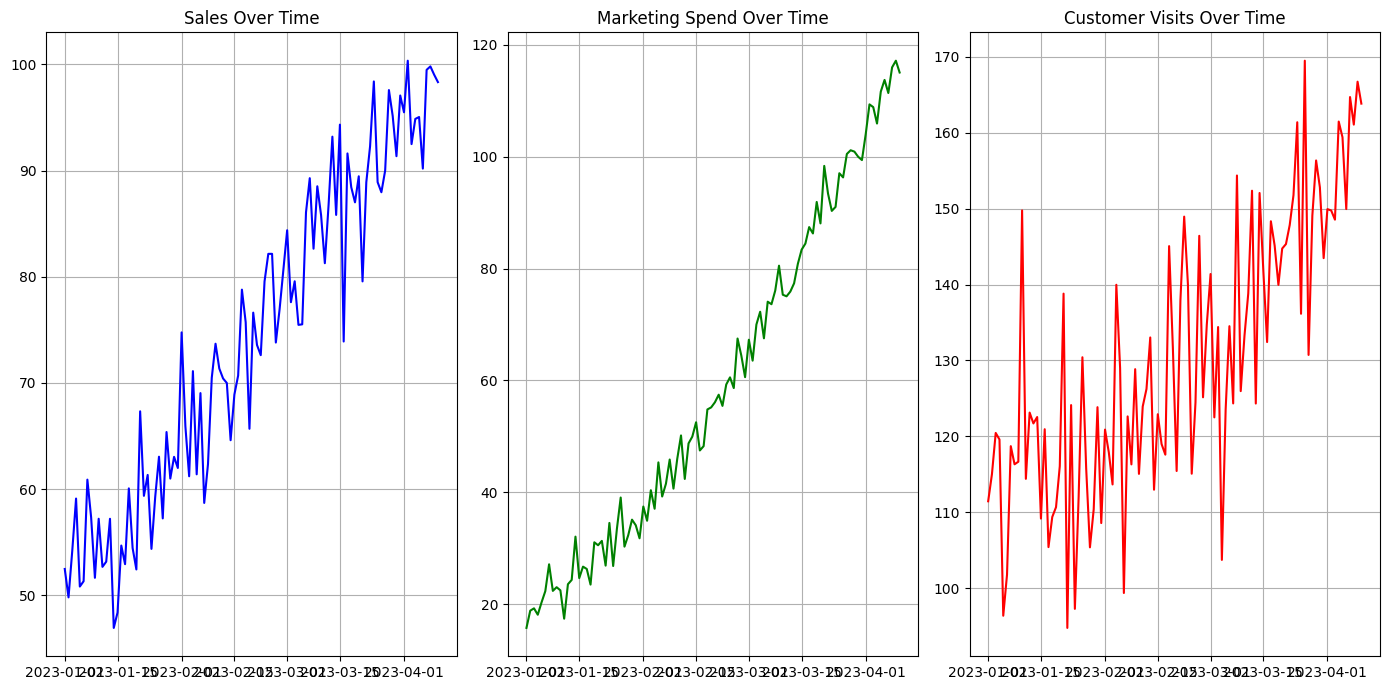

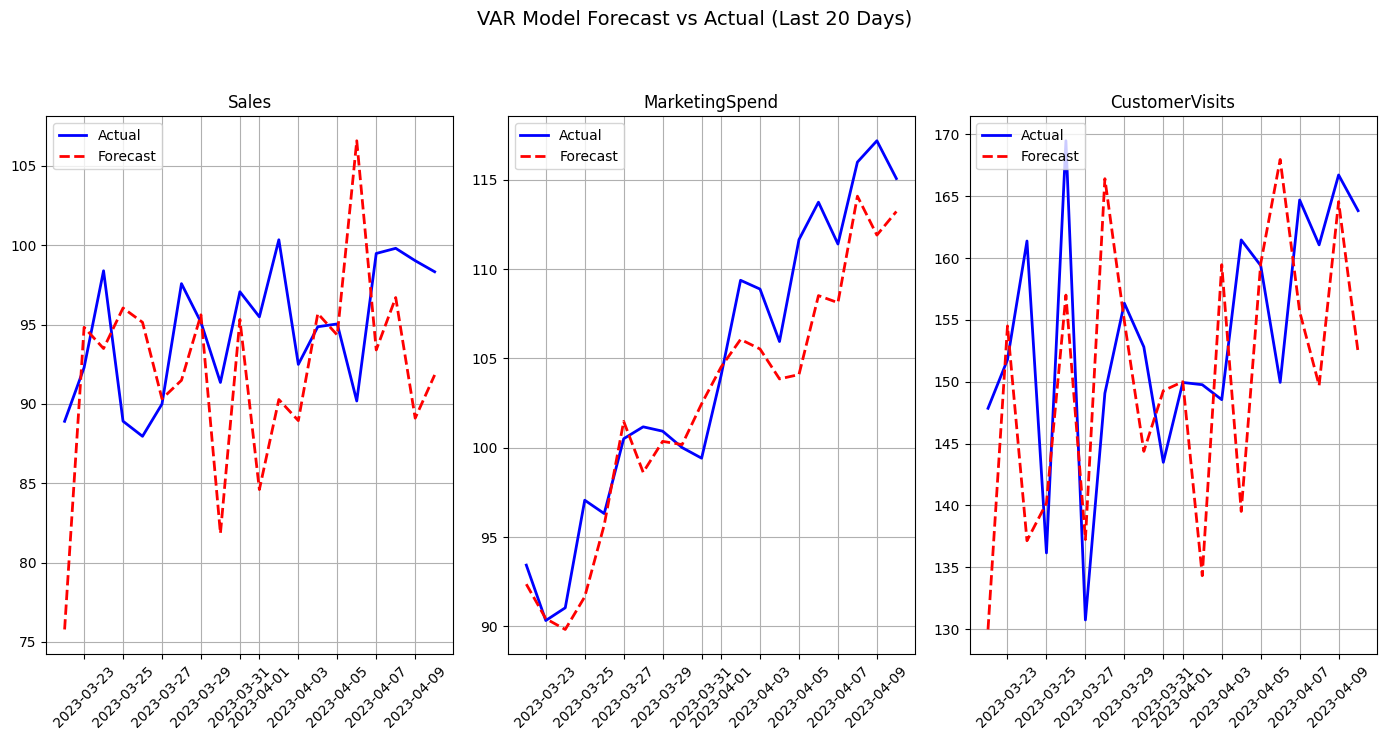


Root Mean Squared Error (RMSE) for each variable:
Sales RMSE: 7.50
MarketingSpend RMSE: 3.21
CustomerVisits RMSE: 12.35


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse

# Set random seed for reproducibility
np.random.seed(42)

# Generate a date range for 100 days
date_range = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Simulating sales data: Let's say sales increase over time with some noise
sales = 50 + np.arange(100) * 0.5 + np.random.normal(0, 5, 100)

# Simulating marketing spend data: Marketing spend increases in a non-linear fashion
marketing_spend = 20 + (np.arange(100) ** 1.5) / 10 + np.random.normal(0, 3, 100)

# Simulating customer visits: Visits increase with marketing spend but with some random noise
customer_visits = 100 + (marketing_spend * 0.5) + np.random.normal(0, 10, 100)

# Creating the DataFrame
df = pd.DataFrame({
    'Sales': sales,
    'MarketingSpend': marketing_spend,
    'CustomerVisits': customer_visits
}, index=date_range)

# Displaying the first few rows of the dataset
print(df.head())

# Plot the data
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(df.index, df['Sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(df.index, df['MarketingSpend'], label='Marketing Spend', color='green')
plt.title('Marketing Spend Over Time')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(df.index, df['CustomerVisits'], label='Customer Visits', color='red')
plt.title('Customer Visits Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

# Split data into training and test sets
n_obs = 20  # Number of observations for forecasting
train, test = df[:-n_obs], df[-n_obs:]

# Fit the VAR model
model = VAR(train)
selected_lag = model.select_order(maxlags=15).aic
fitted_model = model.fit(selected_lag)

# Make the forecast
forecast_input = train.values[-fitted_model.k_ar:]
forecast = fitted_model.forecast(forecast_input, steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)

# Plot the forecast vs actual values
plt.figure(figsize=(14, 7))

for i, col in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(test.index, test[col], label='Actual', color='blue', linewidth=2)
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast', color='red', linestyle='--', linewidth=2)
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left')

plt.suptitle("VAR Model Forecast vs Actual (Last 20 Days)", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Evaluate the model using RMSE
print("\nRoot Mean Squared Error (RMSE) for each variable:")
for col in df.columns:
    error = rmse(test[col], forecast_df[col])
    print(f'{col} RMSE: {error:.2f}')
